In [126]:
#importa as bibliotecas
import datetime as dt
import bs4 as bs
import quandl
import requests
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
from matplotlib import pyplot as plt
from sklearn import *

In [118]:
# numero de acoes que serao estudadas
num_acoes = 3

In [119]:
# decide intervalo de tempo a ser estudado
data_inicial = dt.datetime(2017,8,1)
data_final = dt.datetime(2018,1,1)

In [120]:
# pega as opcoes das 100 maiores empresas utilizando web scraping
resp = requests.get('https://en.wikipedia.org/wiki/S%26P_100')
soup = bs.BeautifulSoup(resp.text, 'lxml')
tabela_sp_100 = soup.find('table',{'class':'wikitable sortable'})
tickers = []
for linha in tabela_sp_100.find_all('tr')[1:]:
    tickers.append(linha.findAll('td')[0].text.replace("\n",''))
tickers = tickers[:num_acoes] 
tickers # mostra somente as primeiras

['AAPL', 'ABBV', 'ABT', 'ACN', 'AGN', 'AIG']

In [121]:
# pega os precos das acoes
dados = pd.DataFrame()
for ticker in tickers:
    dados = dados.append(wb.DataReader(ticker,'robinhood',data_inicial,data_final))
dados.head()

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
AAPL   2017-10-13  154.651700  154.937300         False  154.080300   
       2017-10-16  157.498600  157.616800         False  155.301800   
       2017-10-17  158.079800  158.473900         False  156.858300   
       2017-10-18  157.380400  158.316200         False  157.222800   
       2017-10-19  153.656700  154.740300         False  152.711000   

                   open_price session    volume  
symbol begins_at                                 
AAPL   2017-10-13  154.395500     reg  16394188  
       2017-10-16  155.548100     reg  24121452  
       2017-10-17  157.400100     reg  18997275  
       2017-10-18  158.030600     reg  16374164  
       2017-10-19  154.415200     reg  42584166

In [122]:
#renomeia e trata e define as colunas
dados = dados.reset_index().rename({'symbol':'acao','begins_at':'data','close_price':'preco_fechamento','high_price':'preco_maximo','low_price':'preco_minimo','open_price':'preco_abertura','volume':'quantidade'},axis='columns').drop(['interpolated','session'],axis='columns').astype({'preco_fechamento':float,'preco_maximo':float,'preco_minimo':float,'preco_abertura':float})
dados.head()

,acao,data,preco_fechamento,preco_maximo,preco_minimo,preco_abertura,quantidade
0,AAPL,2017-10-13,154.6517,154.9373,154.0803,154.3955,16394188
1,AAPL,2017-10-16,157.4986,157.6168,155.3018,155.5481,24121452
2,AAPL,2017-10-17,158.0798,158.4739,156.8583,157.4001,18997275
3,AAPL,2017-10-18,157.3804,158.3162,157.2228,158.0306,16374164
4,AAPL,2017-10-19,153.6567,154.7403,152.7110,154.4152,42584166


Text(0, 0.5, 'Preco de Fechamento [U$]')

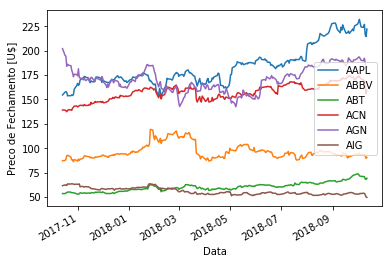

In [123]:
# plota o preco de fechamento
fig, ax = plt.subplots()
dados.groupby('acao').plot(x='data',y='preco_fechamento',ax=ax)
ax.legend(dados['acao'].unique().tolist())
ax.set_xlabel('Data')
ax.set_ylabel('Preco de Fechamento [U$]')

In [130]:
# define os tipos
quandl.ApiConfig.api_key = "xEzLPGkED3ZvDxWbPAa9"
df = quandl.get("WIKI/AMZN", start_date=data_inicial, end_date=data_final)

In [131]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-08-01,996.110,1006.4000,991.5800,996.19,4421395.0,0.0,1.0,996.110,1006.4000,991.5800,996.19,4421395.0
2017-08-02,1001.770,1003.2100,981.7300,995.89,4017780.0,0.0,1.0,1001.770,1003.2100,981.7300,995.89,4017780.0
2017-08-03,999.470,999.5000,984.5900,986.92,3203134.0,0.0,1.0,999.470,999.5000,984.5900,986.92,3203134.0
2017-08-04,989.680,991.6720,982.0000,987.58,2704026.0,0.0,1.0,989.680,991.6720,982.0000,987.58,2704026.0
2017-08-08,994.350,996.2800,985.7900,989.84,2847527.0,0.0,1.0,994.350,996.2800,985.7900,989.84,2847527.0
2017-08-09,982.600,988.0000,975.2700,982.01,3434077.0,0.0,1.0,982.600,988.0000,975.2700,982.01,3434077.0
2017-08-10,976.295,979.8600,954.6800,956.92,5560388.0,0.0,1.0,976.295,979.8600,954.6800,956.92,5560388.0
2017-08-11,960.000,970.3900,951.3800,967.99,3431423.0,0.0,1.0,960.000,970.3900,951.3800,967.99,3431423.0
2017-08-14,978.410,985.5000,976.1900,983.30,3008007.0,0.0,1.0,978.410,985.5000,976.1900,983.30,3008007.0
